<a href="https://colab.research.google.com/github/WelfLowe/ML4non-programmers/blob/main/AI_Technology_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of regression and classification 

We import some 3rd party libraries that we just use in our examples.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, multivariate_normal
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  
import seaborn as sn

## Collect and Preprocess the Data

The data has been collected. We read the structured data that is stored in a file $\verb|heights_weights.csv|$. Recall that we imported the corresponding library: $\verb|import pandas as pd|$.

Then we map inches to cm ($\times 2.54$) and punds to kg ($\times 0.45$). Then we plot the first 10 datapoints of the data table.

In [ ]:
data_url = "https://raw.githubusercontent.com/WelfLowe/ML4non-programmers/main/heights_weights.csv"
data = pd.read_csv(data_url)

#For local file access in a Jupyter Notebook use this line instead
#data = pd.read_csv (r'./heights_weights.csv')
data['Height'] = data['Height'].map(lambda x: x * 2.54)
data['Weight'] = data['Weight'].map(lambda x: x * 0.453592)
print(data.shape[0])
data.head(10)

10000


,Height,Weight,Gender
0,187.571423,109.720985,1
1,174.706036,73.622732,1
2,188.239668,96.497550,1
3,182.196685,99.809504,1
4,177.499761,93.598619,1
5,170.822660,69.042216,1
6,174.714106,83.428219,1
7,173.605229,76.190352,1
8,170.228132,79.800187,1
9,161.179495,70.941642,1


We produce the table for the men ($\verb|'Gender'==1|$) and plot the first five datapoints.

In [ ]:
male =  data['Gender']==1
males = data[male]
males = males.drop('Gender', axis=1)
males.head()

,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499761,93.598619


Same for the women ($\verb|'Gender'==0|$).

In [ ]:
female =  data['Gender']==0
females = data[female]
females = females.drop('Gender', axis=1)
females.head()

,Height,Weight
5000,149.633259,46.306448
5001,165.684232,64.095191
5002,160.957270,59.439332
5003,163.779193,58.137572
5004,156.954464,58.867808


Convert the data table into another format, into a so-called $\verb|numpy|$ arrays. Recall that we imported the corresponding libarary: $\verb|import numpy as np|$.

In [ ]:
#Heights ad weights for males
H_m = males.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
W_m = males.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

#Heights ad weights for females
H_f = females.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
W_f = females.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

Each of the four arrays, the heights and weight of males ($\verb|H_m|$, $\verb|W_m|$) and of females ($\verb|H_f|$, $\verb|W_f|$) is an array with 5000 entries. We check this:

In [ ]:
H_m.shape

(5000, 1)

## Train the Models

### Linear Regression Models

First we build (train) two regression models to predict the weight of a person from his/her height.

We define a training function. It merely uses the trainging function $\verb|fit|$ that is predefined in $\verb|LinearRegression|$. Note, that we imported the corresponding libarary: $\verb|from sklearn.linear_model import LinearRegression|$.

Optionally, we then plot the trained model, a linear function, and all datapoints. Note, that we imported the plotting libarary for that: $\verb|import matplotlib.pyplot as plt|$.

In [ ]:
def linear_regression(X, Y, verbose):
    lr = LinearRegression()  # create object for the class
    lr.fit(X, Y)  # perform linear regression
    Y_pred = lr.predict(X)  # make predictions
    if verbose:
        title = ("Fit Values: a={:.2f} and b={:.2f}".format(lr.coef_[0][0], lr.intercept_[0]))
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.title(title)
        plt.show()
    return lr

We call the training function for the men to get a linear regression model. It is defined by two parameters ($\verb|a_m|$, $\verb|b_m|$) that determine the red line, a visualization of our model. Each dot in the visualization shows one data point of the training with the persons height and weight.

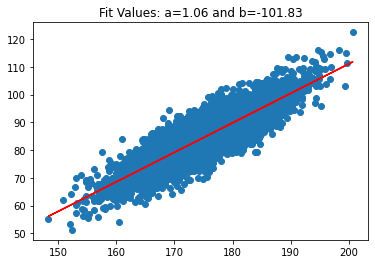

In [ ]:
lr = linear_regression(H_m, W_m, True)
a_m = lr.coef_[0][0]
b_m = lr.intercept_[0]

We call the same training function to build and visualize the prediction model for the women.

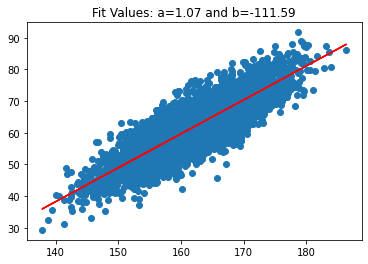

In [ ]:
lr = linear_regression(H_f, W_f, True)
a_f = lr.coef_[0][0]
b_f = lr.intercept_[0]

We define an additional function for visualizing two (or more) models in one plot and call this function on the trained models.

In [ ]:
def plot_lines(X, aa, bb, cc):
    for i in range(0,len(aa)):
        Y = aa[i]*X+bb[i]
        plt.plot(X, Y, cc[i])
    plt.show()

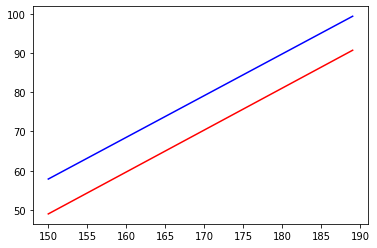

In [ ]:
X = np.arange(150, 190, 1)
plot_lines(X, [a_m, a_f], [b_m,b_f], ['b', 'r'])

<font color='red'>Tasks 1:</font> 
1. In the regression models, what are the predictor and what are the response variables?
2. Specify the trained regression models mapping height to weight for men and woman, resp, by giving their parameters and parameter values.
3. What is your interpretation of the two models when looking at the plots?
4. Was this supervised, unsupervised, or reinforcement lerning and why?

<font color='blue'>Answers 1:</font> 
1. Your answer ...
2. Your answer ...
3. Your answer ...
4. Your answer ...


### Classification Models

Second we build (train) two classification models to classify the geder from weight and height of a person, resp.

Again, we define a training function. It merely uses the trainging function $\verb|fit|$ that is predefined in the $\verb|norm|$ library. Note, that we imported the corresponding libarary: $\verb|from scipy.stats import norm|$.

Optionally, we then plot the trained model, a fitted normal distribution given by $\mu$ and $\sigma$ together with a histogram of all datapoints using again the plotting libarary.

In [ ]:
def fit_normal(X, verbose):
    mu, std = norm.fit(X)
    if verbose:
        # Plot the histogram.
        plt.hist(X, bins=25, density=True, alpha=0.6, color='b')
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, linewidth=2, color='red')
        title = "Fit Values: mu {:.2f} and sigma {:.2f}".format(mu, std)
        plt.title(title)
        plt.show()
    return mu, std

We call the training function four times to get the model parameters for the males' hights and weights, resp., ...

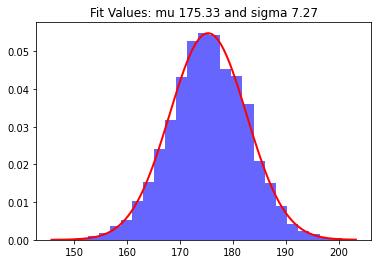

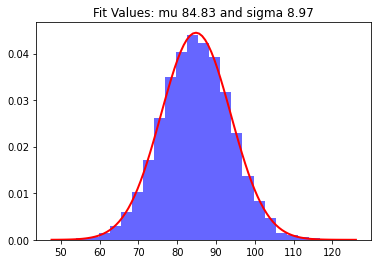

In [ ]:
mu_H_m, sigma_H_m = fit_normal(H_m, True)
mu_W_m, sigma_W_m = fit_normal(W_m, True)

... and for the hights and weights of the females.

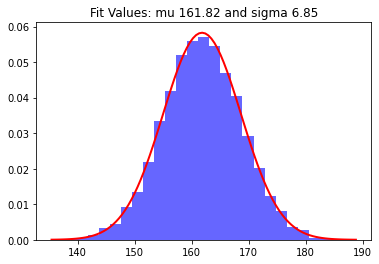

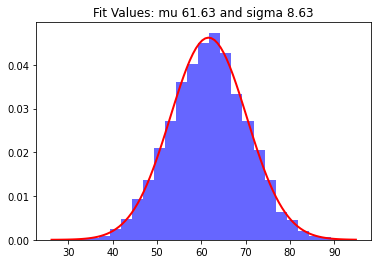

In [ ]:
mu_H_f, sigma_H_f = fit_normal(H_f, True)
mu_W_f, sigma_W_f = fit_normal(W_f, True)

We define an additional function for plotting the classification models, i.e.,  two distributions of males and females. It can be called for both the height and for the weight distributions.

In [ ]:
def plot_norm(mus, sigmas, cc):
    low = mus[0]-4*sigmas[0]
    high = mus[0]+4*sigmas[0]
    for i in range(1,len(mus)):
        low = min(low, mus[i]-4*sigmas[i])
        high = max(high, mus[i]+4*sigmas[i])
    x_axis = np.arange(low, high, 0.1)
    for i in range(0,len(mus)):
        plt.plot(x_axis, norm.pdf(x_axis, mus[i], sigmas[i]), cc[i])
    plt.show()

We call it for plotting the weight distributions ...

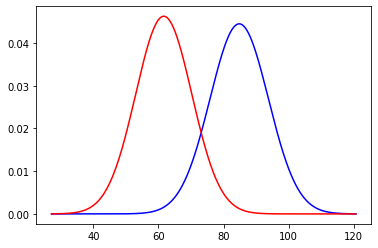

In [ ]:
plot_norm([mu_W_m,mu_W_f],[sigma_W_m,sigma_W_f], ['b','r'])

... and the height distributions.

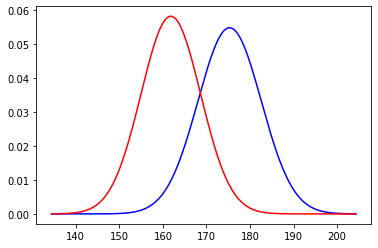

In [ ]:
plot_norm([mu_H_m,mu_H_f],[sigma_H_m,sigma_H_f], ['b','r'])

As there are differences for women and men, we can use the variables weight and height for classifying the gender of a person. This leads to a (bivariate Naive Bayesian) classification model.

<font color='red'>Tasks 2:</font> 
1. We defined two classification models, what are their predictors and responses, respectively?
2. Specify the two trained classification models by giving their parameters and parameter values, resp.
3. What is your interpretation of the two models when looking at the plots?
4. What are implicit assumptions on the collected data making the models valid?

<font color='blue'>Answers 2:</font> 
1. Your answer ...
2. Your answer ...
3. Your answer ...
4. Your answer ...


## Evaluate and Use the Models

### Use Linear Regression for Prediction

We use the regression models to predict the weight based on height and gender. Therefore, we apply the male or female model on the actual persons height.

In [ ]:
def predict_weight(male, height):
    if male:
        return a_m*height + b_m
    else:
        return a_f*height + b_f

welfs_act_weight = 70 #in kg
welfs_act_height = 170 #in cm
welfs_predicted_weight = predict_weight(male=True, height=welfs_act_height) #result in kg
welfs_err = welfs_act_weight-welfs_predicted_weight #in kg
welfs_err 

-9.159749477266047

You could add a new code box right after the one you displayed. In there, you could define new variables, e.g., $\verb|my_actual_weight|$, $\verb|my_actual_height|$ and set the actual values in kg and cm, resp. Then you could call the $\verb|predict_weight|$ function that *uses* the trained model. If you are a woman, you would set $\verb|male=False|$; set the height to $\verb|my_actual_height|$. Then you could print the predicted weight and the error, i.e., the difference between the actual and the predicted weights. See the code box below. Don’t forget to run the code by pushing the “play” button (white triangle in black circle) on every code box in the document from top to this one.

In [ ]:
my_act_weight = 70 #in kg
my_act_height = 170 #in cm
my_predicted_weight = predict_weight(male=False, height=my_act_height) #result in kg
print(my_predicted_weight)
my_prediction_err = my_act_weight-my_predicted_weight #in kg
print(my_prediction_err) 

70.38073291330946
-0.38073291330945835


### Use the Classification Models for (Naive Bayesian) Classification

We use the trained classification models for classifying whether a person is likely to be (fe-)male based on weight and height. Under Naive Bayesian assumption, we multiply the probabilities of of a weight and height to occur in the male and female distributions. The higher joint probability determines the suggested gender. 

In [ ]:
def male_female(act_weight,act_height): 
    p_male = norm.pdf(act_weight, mu_W_m, sigma_W_m)*norm.pdf(act_height, mu_H_m, sigma_H_m)
    p_female = norm.pdf(act_weight, mu_W_f, sigma_W_f)*norm.pdf(act_height, mu_H_f, sigma_H_f)
    if p_male > p_female:
        return 1
    else:
        return 0    

In [ ]:
if male_female(welfs_act_weight, welfs_act_height):
    print("Male")
else:
    print("Female")    

Female


:)

Classify all datapoints.

In [ ]:
df_test = pd.DataFrame()
df_test['True Gender'] = data['Gender']
df_test['Pred Gender'] = data.apply(lambda x: male_female(x['Weight'] , x['Height']), axis=1)
df_test.head(10)

,True Gender,Pred Gender
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


Show confusion matrix.

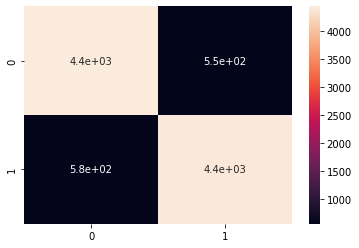

In [ ]:
cf_matrix = confusion_matrix(df_test.iloc[:, 0].values.reshape(-1, 1) , df_test.iloc[:, 1].values.reshape(-1, 1)) 
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
sn.heatmap(df_cm, annot=True)
plt.show()

<font color='red'>Tasks 3:</font> 

1. What is the problem with training and validating the model using the same datapoints?
2. How could we mitigate this problem?


<font color='blue'>Answers 3:</font> 
1. Your answer ...
2. Your answer ...

### Use the univariate Classification Models for Anomaly Detection

Use the trained classification models to check whether (s)he is over- or underweighted. We check how likely it is to find another person of the same gender with a equal or lower weight (in percent). 

This is unsuperwised learning as we do not have used any ground truth on what should be considered over- or underweight.

In [ ]:
def percentile_weight(male, x):
    if male:
        return norm.cdf(x, mu_W_m, sigma_W_m)
    else:
        return norm.cdf(x, mu_W_f, sigma_W_f)

welfs_percentile_weight = percentile_weight(True,welfs_act_weight)*100
welfs_percentile_weight

4.915548866297606

The probability of male weighting less than Welf is estimated to be ca 5%. Unlikely that he is overweight. 

<font color='red'>Tasks 4:</font> 

Pick your own (or a fictive person's) gender, weight, and height. Then
1. Use the regression models to predict the person's weight based on his/her height and gender.
2. Use the classification models for classifying whether the person is likely to be (fe-)male based on weight and height.
3. Use the classification models to check whether (s)he is over- or underweight. Explain why this is a very naive (error prone) approach. 

<font color='blue'>Answers 4:</font> 
1. Your answer ...
2. Your answer ...
3. Your answer ...


### Advanced: Use a Bi-variate Normal Distribution Model for Anomaly Detection

This above approach is maybe too naive to be reasonably considered. 

However, under the Naive Bayesian assumption that height and weight are independent of each other, we have already learnd two bi-variate joint Normal distributions--two models, one for men and one for women--that can be described by the respective weight and height means and standard deviations.

We recall from statistics that the variance of such a distribution is its squared standard deviation and that the co-variance of two independent distributions is zero.

This allows us to plot (a sample of) the learned joint distributions.

In [ ]:
mu_m = [mu_H_m, mu_W_m]
cov_m = np.array([[sigma_H_m**2, 0], [0, sigma_W_m**2]])
pts_m = np.random.multivariate_normal(mu_m, cov_m, size=500)

mu_f = [mu_H_f, mu_W_f]
cov_f = np.array([[sigma_H_f**2, 0], [0, sigma_W_f**2]])
pts_f = np.random.multivariate_normal(mu_f, cov_m, size=500)

In [ ]:
def plot_bivariate(all_pts, person):
  pts = all_pts[0]
  plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.3, color ='b')
  pts = all_pts[1]
  plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.3, color ='r')
  plt.plot(person[0], person[1], '+', color ='k')
  plt.axis('equal')
  plt.grid()
  plt.show()

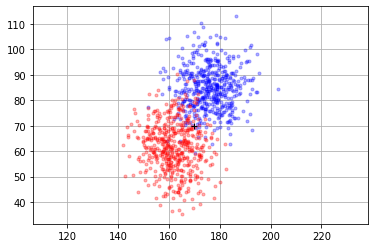

In [ ]:
welf = [welfs_act_height, welfs_act_weight]
plot_bivariate([pts_m, pts_f], welf)

The black cross marks a concrete person's weight and height, here Welf's.

From the joint distribution of the right gender, we can derive the so-called conditional distributions, given a concrte height of a person. These conditional distributions are univariat Normal distributions, if the joint distribution was a multivariate Normal distribution. 

For instance, given Welf's height of $170$ cm, we can derive a distribution of weights of men with the same height. Recall that such a Normal distribution is uniquly defined my its mean $\mu_{w|h=h_0}$ and standard deviation $\sigma_{w|h=h_0}$, with $h_0$ the hight condition, e.g., $170$ cm. 

For our bi-variate Normal distributions it is 

$\mu_{w|h=h_0} = \mu_w + \frac{\mathit{cov}_{h,w} (h_0-\mu_h)}{\sigma_h^2}$

$\sigma_{w|h=h_0}=  \sqrt{\sigma_w^2 - \frac{\mathit{cov}_{h,w}^2}{\sigma_h^2}}$

with $\mathit{cov}_{h,w}$ the covariance of height and weight, and ${\sigma_h^2},{\sigma_w^2}$ the variances of height and weight, resp.

In the special case of independent distributions of height and weight, the so-called marginal distributions, we have $\mathit{cov}_{h,w}=0$. Easy calculations show that in this case $\mu_{w|h=h_0}= \mu_w$ and $\sigma_{w|h=h_0}= \sigma_w$, i.e., the conditional distributions are exactly the marginal distributions.

The function below for drawing joint and conditional dristributions was adopted from [here](https://peterroelants.github.io/posts/multivariate-normal-primer/). More general discussions (and code) on joint and conditional multivatiate Normal distributions are available [here](https://python.quantecon.org/multivariate_normal.html).

In [ ]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_conditional_distributions(mean, cov, condition):
  # Get the mean values from the vector
  mean_x = mean[0]
  mean_y = mean[1]
  # Get the values from the covariance matrix
  A = cov[0, 0]
  B = cov[1, 1]
  C = cov[0, 1] 

  # Calculate x|y
  y_condition = condition[1]  # To condition on y
  mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
  cov_xgiveny = A - C * (1/B) * C

  # Calculate y|x
  x_condition = condition[0]  # To condition on x
  mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
  cov_ygivenx = B - (C * (1/A) * C)

  # Plot the conditional distributions
  fig = plt.figure(figsize=(10, 10))
  gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
  plt.suptitle('Conditional distributions', y=0.93)

  # Plot surface on top left
  ax1 = plt.subplot(gs[0])
  x, y = np.mgrid[0:200:1, 0:200:1] 
  pos = np.dstack((x, y))
  rv = multivariate_normal(mean, cov)
  con = ax1.contourf(x, y, rv.pdf(pos), 33) 
  # y is conditioned upon
  ax1.plot([150, 200], [y_condition, y_condition], 'r--')
  # x is conditioned upon
  ax1.plot([x_condition, x_condition], [60, 110], 'b--')
  ax1.set_xlabel('height', fontsize=13)
  ax1.set_ylabel('weight', fontsize=13)
  ax1.yaxis.set_label_position('right')
  ax1.axis([150,200, 60, 110])

  # Plot y|x
  ax2 = plt.subplot(gs[1])
  yx = np.linspace(0, 200, num=200)
  pyx = norm.pdf(yx, mean_ygivenx, np.sqrt(cov_ygivenx))
  # Plot univariate distribution
  ax2.plot(pyx, yx, 'b--', label=f'$p(w|h={x_condition:.1f})$')
  ax2.grid()
  ax2.legend(loc=0)
  ax2.set_xlabel('density', fontsize=13)
  ax2.set_ylim(60, 110)

  # Plot x|y
  ax3 = plt.subplot(gs[2])
  xy = np.linspace(0, 200, num=200)
  pxy = norm.pdf(xy, mean_xgiveny, np.sqrt(cov_xgiveny))
  # Plot univariate distribution
  ax3.plot(xy, pxy, 'r--', label=f'$p(h|w={y_condition:.1f})$')
  ax3.grid()
  ax3.legend(loc=0)
  ax3.set_ylabel('density', fontsize=13)
  ax3.yaxis.set_label_position('right')
  ax3.set_xlim(150, 200)

  # Clear axis 4 and plot colarbar in its place
  ax4 = plt.subplot(gs[3])
  ax4.set_visible(False)
  divider = make_axes_locatable(ax4)
  cax = divider.append_axes('left', size='20%', pad=0.05)
  cbar = fig.colorbar(con, cax=cax)
  cbar.ax.set_ylabel('density: $p(h, w)$', fontsize=13)
  plt.show()

  return mean_xgiveny, np.sqrt(cov_xgiveny), mean_ygivenx, np.sqrt(cov_ygivenx)

Here a plot and the parameters of the conditional distributions models given Welf's hight and weight. Compare the mean $\mu_{w|h=h_0}$ and standard deviation $\sigma_{w|h=h_0}$ (printed below the plot) with the male population's mean and standard deviation derived earlier.

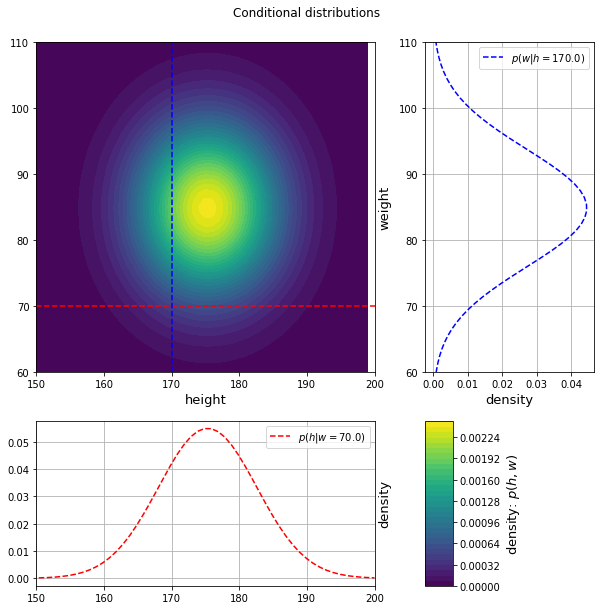

(175.32691860193597, 7.272212730459375, 84.83105736611134, 8.971676137452457)

In [ ]:
plot_conditional_distributions(np.array(mu_m), cov_m, welf)

But that was our initial (too) naive approach: we looked at the propability distributions regardless of the person's weight.

To do better, we need to learn an additional model parameter: the correlation between the two variables for males and females, resp., or to conveniently enter into the $\verb|plot_marginal_distributions|$ function, the covariance matrix.

We get both calculated ("learned") as part of the pandas dataframe package that we use to capture the data.

In [ ]:
males.corr()

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [ ]:
males.cov()

,Height,Weight
Height,52.895657,56.315401
Weight,56.315401,80.507074


In [ ]:
females.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [ ]:
females.cov()

,Height,Weight
Height,46.902793,50.205407
Weight,50.205407,74.449963


We note the expected high correlation between height and weight for both genders, which also shows in the plots of the distributions below.

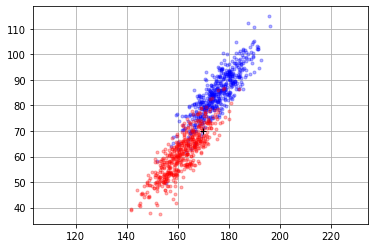

In [ ]:
cov_m = males.cov().values
pts_m = np.random.multivariate_normal(mu_m, cov_m, size=500)
cov_f = females.cov().values
pts_f = np.random.multivariate_normal(mu_f, cov_m, size=500)
plot_bivariate([pts_m, pts_f], welf)

Now we are ready to draw the conditional distributions for given height $h_0$ and weight $w_0$ of a person and to calculate the corresponding parameters.

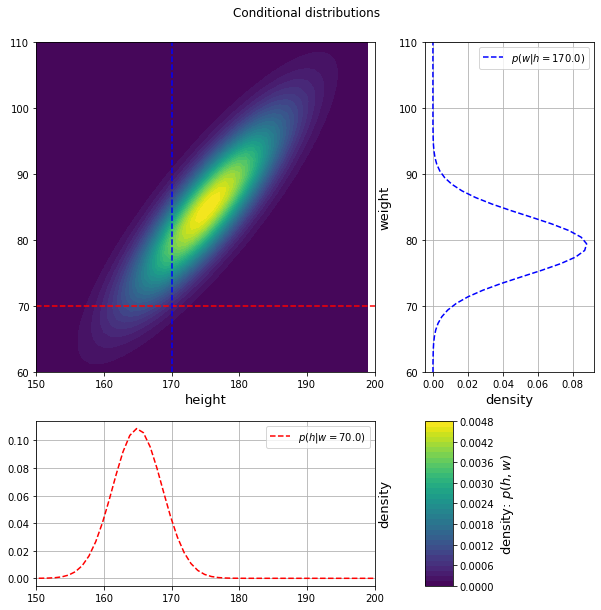

(164.95246451882227, 3.6745805907606424, 79.15974947726602, 4.5333034419072495)

In [ ]:
mu_H, sigma_H, mu_W, sigma_W = plot_conditional_distributions(np.array(mu_m), males.cov().values, welf)
#alternatively, for women remove leading # in the line below  
#mu_H, sigma_H, mu_W, sigma_W = plot_conditional_distributions(np.array(mu_f), females.cov().values, [170,70]) # some person's height and weight
mu_H, sigma_H, mu_W, sigma_W

In [ ]:
def percentile_conditional_weight(male, x, mu_W, sigma_W):
    return norm.cdf(x, mu_W, sigma_W)

welfs_percentile_weight = percentile_conditional_weight(True, welfs_act_weight, mu_W, sigma_W)*100
welfs_percentile_weight

2.1663376542286703

The probability of man weighting less than Welf given his height is estimated to be ca 2%. He is maybe underweight. 

<font color='red'>Tasks A:</font> 

Pick your own (or a fictive person's) gender, weight, and height. Then
1. Use the conditional Normal distribution model for (wo)men to check whether (s)he is over- or underweight. 
2. Explain why it was necessary to consider the correlation between height and weight to get more accurate (less naive) estimates compared to those from <font color='red'>Tasks 4</font>. 

<font color='blue'>Answers A:</font> 
1. Your answer ...
2. Your answer ...